In [1]:
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split

In [2]:
#read train data and validate data
train_data = pd.read_csv("train_data.csv",header=0)
val_data = pd.read_csv("validate_data.csv",header=0)

In [3]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
class RidgeRegression(BaseEstimator, RegressorMixin):
    """ ridge regression"""

    def __init__(self, l2reg=1):
        if l2reg < 0:
            raise ValueError('Regularization penalty should be at least 0.')
        self.l2reg = l2reg

    def fit(self, X, y=None):
        n, num_ftrs = X.shape
        # convert y to 1-dim array, in case we're given a column vector
        y = y.reshape(-1)
        def ridge_obj(w):
            predictions = np.dot(X,w)
            residual = y - predictions
            empirical_risk = np.sum(residual**2) / n
            l2_norm_squared = np.sum(w**2)
            objective = empirical_risk + self.l2reg * l2_norm_squared
            return objective
        self.ridge_obj_ = ridge_obj

        w_0 = np.zeros(num_ftrs)
        self.w_ = minimize(ridge_obj, w_0).x
        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "w_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        return np.dot(X, self.w_)

    def score(self, X, y):
        # Average square error
        try:
            getattr(self, "w_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        residuals = self.predict(X) - y
        return np.dot(residuals, residuals)/len(y)


def do_grid_search_ridge(X_train, y_train, X_val, y_val):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation、
    
    param_grid = [{'l2reg':np.unique(np.concatenate((10.**np.arange(-2.5,-1.5,0.005),)))}]
    
    ridge_regression_estimator = RidgeRegression()
    grid = GridSearchCV(ridge_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l2reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l2reg"])
    return grid, df_toshow

Delete actor_rating

In [4]:
#train data
X_train = train_data[["director_rating", "genre_rating", "language_rating","region_rating", "writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["director_rating", "genre_rating", "language_rating","region_rating", "writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

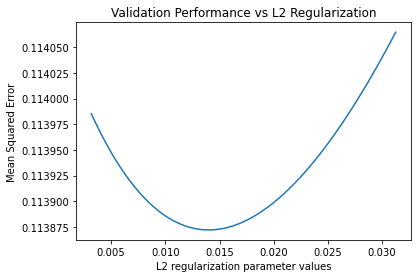

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.113985,0.129216
1,0.003199,0.113984,0.129216
2,0.003236,0.113983,0.129216
3,0.003273,0.113983,0.129217
4,0.003311,0.113982,0.129217
...,...,...,...
195,0.029854,0.114037,0.129762
196,0.030200,0.114044,0.129772
197,0.030549,0.114050,0.129783
198,0.030903,0.114057,0.129794


In [5]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [6]:
#compute linear regression MSE of validation set
l2reg = 0.014
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.11387222917746466


Delete director_rating

In [7]:
#train data
X_train = train_data[["actor_rating", "genre_rating", "language_rating","region_rating", "writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "genre_rating", "language_rating","region_rating", "writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

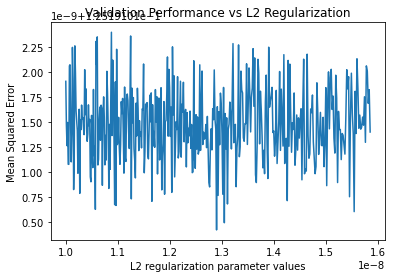

,param_l2reg,mean_test_score,mean_train_score
0,1.000000e-08,0.125191,0.126358
1,1.001152e-08,0.125191,0.126358
2,1.002305e-08,0.125191,0.126358
3,1.003460e-08,0.125191,0.126358
4,1.004616e-08,0.125191,0.126358
...,...,...,...
396,1.577611e-08,0.125191,0.126358
397,1.579429e-08,0.125191,0.126358
398,1.581248e-08,0.125191,0.126358
399,1.583070e-08,0.125191,0.126358


In [8]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
def do_grid_search_ridge(X_train, y_train, X_val, y_val):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation、
    
    param_grid = [{'l2reg':np.unique(np.concatenate((10.**np.arange(-8,-7.8,0.0005),)))}]
    
    ridge_regression_estimator = RidgeRegression()
    grid = GridSearchCV(ridge_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l2reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l2reg"])
    return grid, df_toshow


#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [9]:
#compute linear regression MSE of validation set
l2reg = 1.28e-8
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.1251910109319672


Delete genre_rating

In [10]:
#train data
X_train = train_data[["actor_rating", "director_rating", "language_rating","region_rating", "writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "language_rating","region_rating", "writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

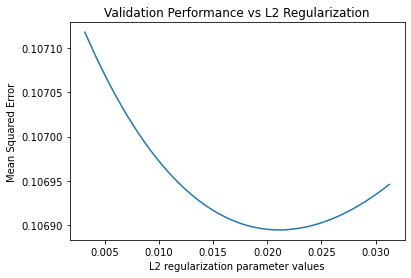

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.107118,0.115256
1,0.003199,0.107117,0.115256
2,0.003236,0.107116,0.115256
3,0.003273,0.107115,0.115256
4,0.003311,0.107114,0.115257
...,...,...,...
195,0.029854,0.106933,0.115693
196,0.030200,0.106936,0.115701
197,0.030549,0.106939,0.115710
198,0.030903,0.106942,0.115719


In [11]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
def do_grid_search_ridge(X_train, y_train, X_val, y_val):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation、
    
    param_grid = [{'l2reg':np.unique(np.concatenate((10.**np.arange(-2.5,-1.5,0.005),)))}]
    
    ridge_regression_estimator = RidgeRegression()
    grid = GridSearchCV(ridge_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l2reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l2reg"])
    return grid, df_toshow


#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [12]:
#compute linear regression MSE of validation set
l2reg = 0.021
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.10689445633767651


Delete language_rating

In [13]:
#train data
X_train = train_data[["actor_rating", "director_rating", "genre_rating", "region_rating", "writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "genre_rating", "region_rating", "writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

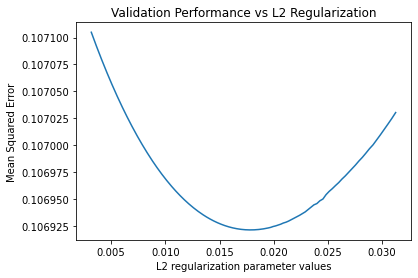

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.107105,0.115297
1,0.003199,0.107104,0.115297
2,0.003236,0.107103,0.115297
3,0.003273,0.107102,0.115297
4,0.003311,0.107101,0.115297
...,...,...,...
195,0.029854,0.107010,0.115816
196,0.030200,0.107015,0.115826
197,0.030549,0.107020,0.115836
198,0.030903,0.107025,0.115846


In [14]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [15]:
#compute linear regression MSE of validation set
l2reg = 0.017
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.10692213307223401


Delete region_rating

In [16]:
#train data
X_train = train_data[["actor_rating", "director_rating", "genre_rating", "language_rating","writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "genre_rating", "language_rating","writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

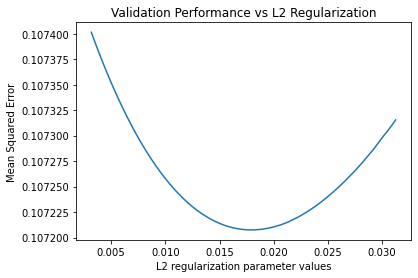

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.107401,0.116077
1,0.003199,0.107400,0.116077
2,0.003236,0.107399,0.116078
3,0.003273,0.107398,0.116078
4,0.003311,0.107397,0.116078
...,...,...,...
195,0.029854,0.107296,0.116584
196,0.030200,0.107301,0.116594
197,0.030549,0.107305,0.116604
198,0.030903,0.107310,0.116614


In [17]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [18]:
#compute linear regression MSE of validation set
l2reg = 0.017
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.10720818470430833


Delete writer_rating

In [19]:
#train data
X_train = train_data[["actor_rating", "director_rating", "genre_rating", "language_rating","region_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "genre_rating", "language_rating","region_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

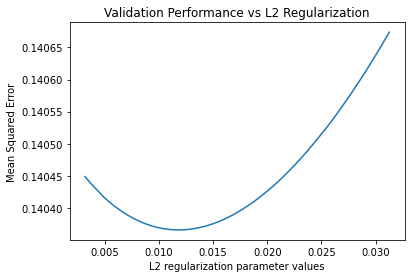

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.140449,0.150200
1,0.003199,0.140448,0.150200
2,0.003236,0.140447,0.150200
3,0.003273,0.140447,0.150200
4,0.003311,0.140446,0.150200
...,...,...,...
195,0.029854,0.140634,0.150798
196,0.030200,0.140643,0.150811
197,0.030549,0.140653,0.150823
198,0.030903,0.140663,0.150836


In [20]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [21]:
#compute linear regression MSE of validation set
l2reg = 0.012
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.14036582767773037


 Delete date

In [22]:
#train data
X_train = train_data[["actor_rating", "director_rating", "genre_rating", "language_rating","region_rating", "writer_rating"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "genre_rating", "language_rating","region_rating", "writer_rating"]].values
y_val = val_data[["movie_rating"]].values

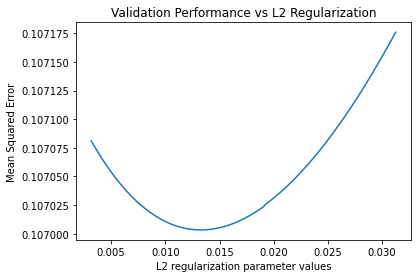

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.107081,0.115249
1,0.003199,0.107080,0.115249
2,0.003236,0.107080,0.115249
3,0.003273,0.107079,0.115250
4,0.003311,0.107079,0.115250
...,...,...,...
195,0.029854,0.107152,0.115673
196,0.030200,0.107158,0.115681
197,0.030549,0.107164,0.115690
198,0.030903,0.107170,0.115698


In [23]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [24]:
#compute linear regression MSE of validation set
l2reg = 0.014
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.10700369255185879


So we delete genre_rating for ridge regression